# House Pricing: Automatic Data preprocessing & Modeling Techniques Selection using Pipelines

Notebook written by Pedro de Matos Gonçalves

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import collections
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N
import matplotlib.pyplot as plt # data visualization library
import plotly.graph_objs as go # interactive plotting library
from IPython.display import display # display from IPython.display
from itertools import cycle # function used for cycling over values


# Libraries used for Modeling
from scipy import stats
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBRegressor, plot_importance as plot_importance_xgb
from lightgbm import LGBMRegressor, plot_importance as plot_importance_lgbm


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
# Importing the data and displaying some rows
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

display(df.head(10))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
# Checking for columns where null values are higher than 50% of it's total
df_aux_nulls = [(c, df[c].isna().mean()*100) for c in df]
df_aux_nulls = pd.DataFrame(df_aux_nulls, columns=["column_name", "null_percentage"])

df_aux_nulls = df_aux_nulls[df_aux_nulls.null_percentage > 50]
print("Columns with more than 50% null percentage:")
df_aux_nulls.sort_values("null_percentage", ascending=False) # These are the 3 columns with more than 50% of nulls

Columns with more than 50% null percentage:


,column_name,null_percentage
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425


In [4]:
# Transforming our target into log scale, to help improve generalization
df['SalePrice'] = np.log(df.SalePrice)

# Separating our target
target = df['SalePrice']

# Let's drop the highly null columns and our target from the original dataframe.
df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'], axis=1, inplace=True)

In [5]:
# Taking sell month and year as categorical columns
df['YrSold'] = df['YrSold'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')

# Now, we separate categorical and numerical column dataframes.
categorical_df = df.select_dtypes(include=['object'])
numeric_df = df.select_dtypes(exclude=['object'])

# And then, we store the names of the categorical and numerical columns.
categorical_features = list(categorical_df.columns)
numeric_features = list(numeric_df.columns)

print("Categorical features:\n", categorical_features)
print("\nNumeric features:\n", numeric_features)

Categorical features:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Numeric features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'O


## Model training & Evaluation functions

After all the preprocessing, we are now ready for building and evaluating different Machine Learning models.

First, let's create a function responsible for evaluating our regressors on a test set we will create.


In [6]:
def testSetResultsRegressor(regressor, x_test, y_test):
    predictions = regressor.predict(x_test)
    
    results = []
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append(mae)
    results.append(mse)
    results.append(rmse)
    results.append(r2)
    
    print("\n\n#---------------- Test set results (Best Regressor) ----------------#\n")
    print("Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² Score:")
    print(results)
    
    return results

Now, we fit several different data preprocessing, feature selection and modeling techniques inside a Pipeline, to check which group of techniques has better performance.

In [7]:
# Building a Pipeline responsible for finding best model and it's parameters
def defineBestModelPipeline(df, target, categorical_features, numeric_features):
    
    # Splitting data into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=1)
    y_train = y_train.to_numpy() # Transforming training targets into numpy arrays
    y_test = y_test.to_numpy() # Transforming test targets into numpy arrays
    
    
    # Pipeline's data transformations
    # 1st -> Numeric Transformers (we'll try several different ones)
    numeric_transformer_1 = Pipeline(steps=[('imp', IterativeImputer(max_iter=10, random_state=1)),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_2 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=7)),
                                            ('scaler', StandardScaler())])
    
    numeric_transformer_3 = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_4 = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    
    # 2nd -> Categorical Transformer
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    
    # 3rd -> Different Data Transformation Steps, each one with a different numerical transformation
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_features),
                                                             ('cat', categorical_transformer, categorical_features)])
    
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_features),
                                                             ('cat', categorical_transformer, categorical_features)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_3, numeric_features),
                                                             ('cat', categorical_transformer, categorical_features)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_4, numeric_features),
                                                             ('cat', categorical_transformer, categorical_features)])
    
    
    
    # Applying different data transformations in RandomSearchCV to find 
    # the best imputing strategy, the best feature engineering strategy
    # and the best model with it's parameters
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1), # Initializing data transformation step by choosing any of the above
                           ('feature_eng', PCA()), # Initializing feature engineering step by choosing any desired method
                           ('reg', SVR())]) # Initializing modeling step of the pipeline with any model object
                           #memory='cache_folder') -> Used to optimize memory when needed
    
    
    
    # Now, defining the grid of parameters to search for. RandomSearchCV will randomly chose
    # options for each step inside the dictionaries, and return the best one for us as our final pipeline.
    params_grid = [
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [KNeighborsRegressor()],
                     'reg__n_neighbors': stats.randint(1, 10),
                     'reg__metric': ['minkowski', 'euclidean']},

        

                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [LinearRegression()]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [SVR()],
                     'reg__C': stats.uniform(0.01, 100),
                     'reg__gamma': stats.uniform(0.01, 100)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [DecisionTreeRegressor()],
                     'reg__criterion': ['gini', 'entropy'],
                     'reg__max_features': [None, "auto", "log2"],
                     'reg__max_depth': [None, stats.randint(1, 15)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [RandomForestRegressor()],
                     'reg__n_estimators': stats.randint(10, 300),
                     'reg__max_features': [None, "auto", "log2"],
                     'reg__max_depth': stats.randint(1, 9)},
        
                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [ExtraTreesRegressor()],
                     'reg__n_estimators': stats.randint(10, 300),
                     'reg__max_features': [None, "auto", "log2"],
                     'reg__max_depth': stats.randint(1, 9)},

                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [GradientBoostingRegressor()],
                     'reg__n_estimators': stats.randint(10, 300),
                     'reg__learning_rate': stats.uniform(0.01, 1.5),
                     'reg__max_depth': stats.randint(1, 12)},

        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [LGBMRegressor()],
                     'reg__n_estimators': stats.randint(1, 150),
                     'reg__learning_rate': stats.uniform(0.01, 1.2),
                     'reg__max_depth': stats.randint(1, 9)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [XGBRegressor()],
                     'reg__n_estimators': stats.randint(1, 175),
                     'reg__eta': stats.uniform(0.01, 1.2),
                     'reg__max_depth': stats.randint(1, 10),
                     'reg__gamma': stats.uniform(0.01, 1.2)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [StackingRegressor(estimators=[('svr', SVR(C=10, gamma=10)),
                                                           ('rf', RandomForestRegressor(max_depth=7, max_features=None, n_estimators=20, n_jobs=-1)),
                                                           ('xgb', XGBRegressor(eta=0.8, gamma=0.5, max_depth=7, n_estimators=30))], 
                                                final_estimator=LinearRegression())]},
        
        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.8)),
                                     PCA(n_components=round(x_train.shape[1]*0.7)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)),
                                     TSNE(n_components=round(x_train.shape[1]*0.7)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.6))],
                     'reg': [StackingRegressor(estimators=[('lgbm', LGBMRegressor(n_estimators=50, learning_rate=0.6, max_depth=8)),
                                                           ('etc', ExtraTreesRegressor(max_depth=8, max_features=None, n_estimators=20)),
                                                           ('gbt', GradientBoostingRegressor(learning_rate=0.9, max_depth=7, n_estimators=20))], 
                                                final_estimator=LinearRegression())]}
                ]
    
    
    # Now, we fit a RandomSearchCV to search over the grid of parameters defined above
    metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    
    best_model_pipeline = RandomizedSearchCV(pipe, params_grid, n_iter=100, scoring=metrics, 
                                             refit='neg_root_mean_squared_error', 
                                             n_jobs=-1, cv=4, random_state=42)

    best_model_pipeline.fit(x_train, y_train)
    
    
    # At last, we check the final results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Regressor found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[2])
    print("\n\n#---------------- Best Estimator's average RMSE Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline

In [8]:
# Calling the function above, returing train/test data and best model's pipeline
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(df, target, categorical_features, numeric_features)


# Checking best model's performance on test data
test_set_results = testSetResultsRegressor(best_model_pipeline, x_test, y_test)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):




#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#

 ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'B...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'Bldg

After going through all steps in RandomSearchCV, we can check the results from it's steps using the "cvresults" atrribute.

In [9]:
# Visualizing all results and metrics, from all models, obtained by the RandomSearchCV steps
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_data_transformations,param_feature_eng,param_reg,param_reg__learning_rate,param_reg__max_depth,param_reg__n_estimators,param_reg__max_features,param_reg__metric,param_reg__n_neighbors,param_reg__criterion,param_reg__C,param_reg__gamma,param_reg__eta,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.005007,0.000763,0.000000,0.000000,"ColumnTransformer(transformers=[('num',\n ...",TSNE(n_components=60),GradientBoostingRegressor(learning_rate=0.0796...,0.285152,8,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,66
1,1.979473,0.038962,0.438713,0.066680,"ColumnTransformer(transformers=[('num',\n ...",PCA(n_components=68),RandomForestRegressor(),NaN,3,97,log2,NaN,NaN,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,-0.278827,-0.240363,-0.236551,-0.258945,-0.253671,0.016814,45,-0.132382,-0.108747,-0.094200,-0.107408,-0.110684,0.013757,45,-0.363843,-0.329768,-0.306921,-0.327731,-0.332066,0.020409,45,0.282700,0.299868,0.313483,0.275772,0.292956,0.014745,45
2,8.892847,0.199848,0.457660,0.078549,"ColumnTransformer(transformers=[('num',\n ...",PCA(n_components=60),RandomForestRegressor(),NaN,6,267,None,NaN,NaN,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,-0.120236,-0.099669,-0.111226,-0.090749,-0.105470,0.011197,8,-0.032595,-0.019239,-0.025477,-0.015680,-0.023248,0.006436,9,-0.180542,-0.138704,-0.159616,-0.125218,-0.151020,0.020993,9,0.823385,0.876137,0.814327,0.894276,0.852031,0.033941,9
3,0.003710,0.000071,0.000000,0.000000,"ColumnTransformer(transformers=[('num',\n ...",TSNE(n_components=52),LGBMRegressor(),0.264807,8,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,68
4,1.468835,0.046608,0.484433,0.072346,"ColumnTransformer(transformers=[('num',\n ...",PCA(n_components=68),KNeighborsRegressor(),NaN,NaN,NaN,NaN,euclidean,9,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,-0.137261,-0.121586,-0.120497,-0.113789,-0.123283,0.008605,20,-0.042324,-0.031207,-0.031178,-0.023151,-0.031965,0.006822,22,-0.205728,-0.176656,-0.176574,-0.152155,-0.177778,0.018976,22,0.770671,0.799083,0.772778,0.843897,0.796607,0.029508,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003610,0.000087,0.000000,0.000000,"ColumnTransformer(transformers=[('num',\n ...",TSNE(n_components=45),GradientBoostingRegressor(learning_rate=0.0796...,0.663509,7,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,60
96,7.123167,0.202303,0.529957,0.066889,"ColumnTransformer(transformers=[('num',\n ...",PCA(n_components=60),"StackingRegressor(estimators=[('svr', SVR(C=10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'data_

In [10]:
# Now visualizing all results and metrics obtained only by the best classifier
display(df_results[df_results['rank_test_neg_root_mean_squared_error'] == 1])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_data_transformations,param_feature_eng,param_reg,param_reg__learning_rate,param_reg__max_depth,param_reg__n_estimators,param_reg__max_features,param_reg__metric,param_reg__n_neighbors,param_reg__criterion,param_reg__C,param_reg__gamma,param_reg__eta,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2
6,3.047665,0.033654,0.420205,0.088948,"ColumnTransformer(transformers=[('num',\n ...",None,GradientBoostingRegressor(learning_rate=0.0796...,0.0796756,3,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'data_transformations': ColumnTransformer(tra...,-0.097544,-0.089092,-0.0959,-0.072182,-0.08868,0.010038,1,-0.023254,-0.015103,-0.018699,-0.010122,-0.016794,0.004815,1,-0.152492,-0.122896,-0.136743,-0.100608,-0.128185,0.019056,1,0.874002,0.902762,0.863726,0.93175,0.89306,0.026527,1


## Plotting Feature Importances

If we want to, it's also possible to check the feature importances of the best model, in case they're easy to understand and explain.

Just remember that, if the best pipeline found in RandomSearchCV applies dimensionality reduction or creates new features using PolynomialFeatures, it will be much harder to explain importances.

In a scenario that no transformations are applied to the features inside the pipeline, if the model is tree-based (RandomForestClassifier, for example), or linear regression-based (Logistic Regression, for example), then explaining most important features becomes much easier.


In [11]:
# Here, we access the categorical feature names generated by OneHotEncoder, and then concatenate them
# with the numerical feature names, in the same order our pipeline is applying data transformations.
categorical_features_after_onehot = best_model_pipeline.best_estimator_.named_steps['data_transformations']\
                                        .transformers_[1][1].named_steps['onehot'].get_feature_names()

feature_names_in_order = numeric_features + categorical_features_after_onehot

print(feature_names_in_order)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '0_RL', '0_RH', '0_RM', '0_C (all)', '0_FV', '1_Pave', '1_Grvl', '2_Reg', '2_IR1', '2_IR2', '2_IR3', '3_Lvl', '3_HLS', '3_Bnk', '3_Low', '4_AllPub', '4_NoSeWa', '5_Inside', '5_Corner', '5_FR2', '5_CulDSac', '5_FR3', '6_Gtl', '6_Mod', '6_Sev', '7_Somerst', '7_BrkSide', '7_Crawfor', '7_Sawyer', '7_NWAmes', '7_CollgCr', '7_NAmes', '7_NridgHt', '7_MeadowV', '7_OldTown', '7_Gilbert', '7_IDOTRR', '7_Timber', '7_NPkVill', '7_Edwards', '7_Blmngtn', '7_SawyerW', '7_StoneBr', '7_ClearCr', '7_NoRidge', '7_Mitchel', '7_SWISU'


#---------------- Bar plot with feature importances ----------------#


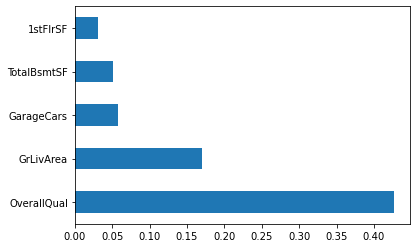

In [12]:
# Plotting feature importances from LGBM Regressor
# plot_importance_lgbm(best_model_pipeline.best_estimator_[2], figsize=(10, 14))


# Plotting feature importances from XGB Regressor
# plot_importance_xgb(best_model_pipeline.best_estimator_[2], figsize=(10, 14))


# # Plotting feature importances of the best model, if linear regression-based (top 5 features)
# print("\n#---------------- Bar plot with feature importances ----------------#")
# feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['reg'].coef_[0], index=feature_names_in_order)
# feat_importances.nlargest(5).plot(kind='barh')


# Plotting feature importances of the best model, if sklearn tree-based (top 5 features)
print("\n#---------------- Bar plot with feature importances ----------------#")
feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['reg'].feature_importances_, index=feature_names_in_order)
feat_importances.nlargest(5).plot(kind='barh')


---

# Predictions

Now that we have tried different preprocessing and modeling techniques, resulting in a final best pipeline, let's use it to predict the test data provided by kaggle

In [13]:
# Importing the data and displaying some rows
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

# Dropping the unnecessary columns
df_test.drop(['Id', 'Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

# Applying best_model_pipeline:
# Step 1 -> Transforming data the same way we did in the training set;
# Step 2 -> making predictions using the best model obtained by RandomSearchCV.
test_predictions = best_model_pipeline.predict(df_test)

# Because our model was trained using a logarithmic scale of the target, it's predictions will also
# be log. We need to get them back to linear scale using np.exp()
test_predictions = np.exp(test_predictions)
print(test_predictions)

[126435.68465769 158288.35833123 180186.04653891 ... 154837.27390704
 123999.76574656 239463.18777739]


In [14]:
# Generating the predictions file that is going to be submitted to the competition
df_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

df_submission['SalePrice'] = test_predictions # Adding a column with predicted values

df_submission.drop(df_submission.columns.difference(['Id', 'SalePrice']), axis=1, inplace=True) # Selecting only needed columns

df_submission.head(10)

,Id,SalePrice
0,1461,126435.684658
1,1462,158288.358331
2,1463,180186.046539
3,1464,188244.547176
4,1465,190584.917481
5,1466,173356.682206
6,1467,177394.338589
7,1468,165785.632883
8,1469,189481.425706
9,1470,124453.609634


In [15]:
# Checking if the number of rows is OK (the file is expected to have 1459 rows)
df_submission.count()

Id           1459
SalePrice    1459
dtype: int64

In [16]:
# Writing submitions to CSV file
df_submission.to_csv('submission.csv', index=False)